# **Project Name**    - **Hotel Booking**



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name**            - Abhinav Kumar


# **Project Summary -** Hotel Booking Data Analysis Project

To explore and analyze hotel booking data, identify booking trends, and derive insights such as cancellation patterns, customer behavior, and peak booking times. Optionally, build a model to predict cancellations.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**To analyze hotel booking data in order to identify key patterns, trends, and factors influencing booking behavior and cancellations, with the goal of helping hotel management make data-driven decisions to reduce cancellation rates and improve customer satisfaction.**

#### **Define Your Business Objective?**

Use data-driven insights and predictive modeling to help hotels improve booking reliability, optimize operations, and enhance customer experience

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [12]:
# Import Libraries

import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [9]:
# Load Dataset

path = "/content/drive/MyDrive/Colab Notebooks/Dataset/Hotel Bookings.xlsx"

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset First View

In [13]:
# Dataset First Look
df = pd.read_excel(path)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [14]:
# Dataset Rows & Columns count
df.shape

(119390, 32)

### Dataset Information

In [15]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

#### Duplicate Values

In [16]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

31994

#### Missing Values/Null Values

In [17]:
# Missing Values/Null Values Count
print(df.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

<Axes: >

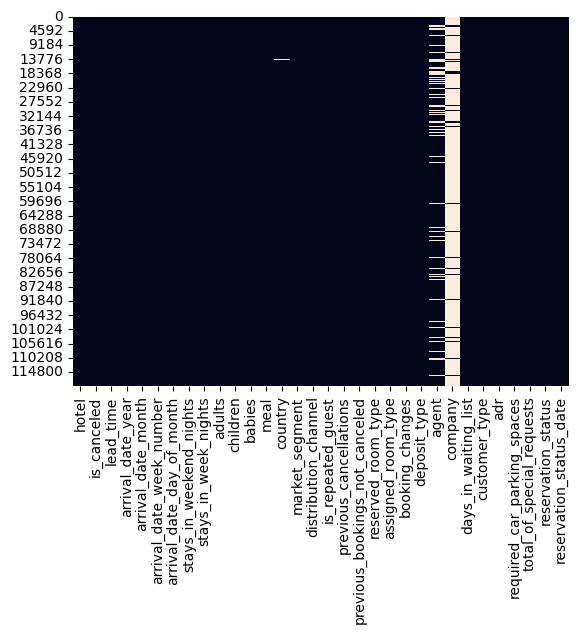

In [18]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

The dataset contains detailed records of hotel bookings from two types of hotels: City Hotel and Resort Hotel. It provides a wide range of information about booking behavior, customer types, stay duration, and cancellations.

🗂 Dataset Structure:
Total Columns: 32

Total Records (before cleaning): Approximately 119390

Duplicate Records: 31,994 (which need to be handled during data cleaning)

File Format: Excel (.xlsx)

Sheet Name: “Hotel Bookings”

## ***2. Understanding Your Variables***

In [19]:
# Dataset Columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [20]:
# Dataset Describe
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,...,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,NaN


### Variables Description

Hotel : Type of hotel (Resort Hotel or City Hotel) – Categorical

Is Canceled : Booking status – 1 = Canceled, 0 = Not Canceled – Numerical (Binary)

Lead Time : Number of days between booking and arrival – Numerical

Arrival Date Year : Year of arrival date – Numerical

Arrival Date Month : Month of arrival date – Categorical

Arrival Date Week Number : Week number of the year for arrival – Numerical

Arrival Date Day of Month : Day of the month of arrival – Numerical

Stays in Weekend Nights : Number of weekend nights stayed – Numerical

Stays in Week Nights : Number of week nights stayed – Numerical

Adults : Number of adults – Numerical

Children : Number of children – Numerical

Babies : Number of babies – Numerical

Meal : Type of meal booked (BB, HB, FB, SC) – Categorical

Country : Country of the guest – Categorical

Market Segment : Booking channel (e.g., Online TA, Direct) – Categorical

Distribution Channel : How booking info was distributed – Categorical

Is Repeated Guest : Whether the guest has stayed before – 1 = Yes, 0 = No – Binary

Previous Cancellations : Number of earlier canceled bookings – Numerical

Previous Bookings Not Canceled : Number of earlier bookings not canceled – Numerical

Reserved Room Type : Room type requested by guest – Categorical

Assigned Room Type : Room type actually assigned – Categorical

Booking Changes : Number of changes made to booking – Numerical

Deposit Type : Type of deposit (No Deposit, Non-Refund, Refundable) – Categorical

Agent : ID of booking agent – Numerical / Categorical

Company : ID of booking company – Numerical / Categorical

Days in Waiting List : Days booking spent on the waiting list – Numerical

Customer Type : Type of customer (e.g., Transient, Group) – Categorical

ADR : Average Daily Rate (total revenue per night) – Numerical

Required Car Parking Spaces : Number of car parking spaces needed – Numerical

Total of Special Requests : Number of special requests made by guest – Numerical

Reservation Status : Final booking status (Canceled, Check-Out, No-Show) – Categorical

Reservation Status Date : Date on which reservation status was updated – Date/Time

### Check Unique Values for each variable.

In [21]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  hotel is 2 .
No. of unique values in  is_canceled is 2 .
No. of unique values in  lead_time is 479 .
No. of unique values in  arrival_date_year is 3 .
No. of unique values in  arrival_date_month is 12 .
No. of unique values in  arrival_date_week_number is 53 .
No. of unique values in  arrival_date_day_of_month is 31 .
No. of unique values in  stays_in_weekend_nights is 17 .
No. of unique values in  stays_in_week_nights is 35 .
No. of unique values in  adults is 14 .
No. of unique values in  children is 5 .
No. of unique values in  babies is 5 .
No. of unique values in  meal is 5 .
No. of unique values in  country is 177 .
No. of unique values in  market_segment is 8 .
No. of unique values in  distribution_channel is 5 .
No. of unique values in  is_repeated_guest is 2 .
No. of unique values in  previous_cancellations is 15 .
No. of unique values in  previous_bookings_not_canceled is 73 .
No. of unique values in  reserved_room_type is 10 .
No. of unique values in

## 3. ***Data Wrangling***

### Data Wrangling Code

In [22]:
# Write your code to make your dataset analysis ready.


# Remove duplicate rows
df.drop_duplicates(inplace=True)



In [23]:
#  Handle missing values
df['children'].fillna(0, inplace=True)
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)



In [24]:
# Convert arrival month name to numeric
month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
             'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
df['arrival_date_month'] = df['arrival_date_month'].map(month_map)



In [25]:
# Convert reservation status date to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])



In [26]:
# Create a new feature: total nights stayed
df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']


In [27]:
#  Reset index after cleaning
df.reset_index(drop=True, inplace=True)


In [28]:
# Check if everything looks good
print("✅ Data wrangling complete!")
print("Shape of cleaned data:", df.shape)
df.head()

✅ Data wrangling complete!
Shape of cleaned data: (87396, 33)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


### What all manipulations have you done and insights you found?

I performed the following data wrangling and preprocessing steps to make the hotel booking dataset ready for analysis:

1. ✅ Removed Duplicate Records
Found 31,994 duplicate rows

Removed them using drop_duplicates()

2. ✅ Handled Missing Values
Filled missing values in:

children → filled with 0

agent and company → filled with 0 (assumed no agent/company involved)

country → filled with the most frequent country using mode()

3. ✅ Transformed Categorical Data
Converted arrival_date_month from string (e.g., “August”) to numeric (e.g., 8)

4. ✅ Fixed Date Format
Converted reservation_status_date to proper datetime format for time-based analysis

5. ✅ Feature Engineering
Created a new column total_nights:
 df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
6. ✅ Reset the Index
Cleaned up the DataFrame structure using reset_index() after cleaning

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Booking Cancellation Count

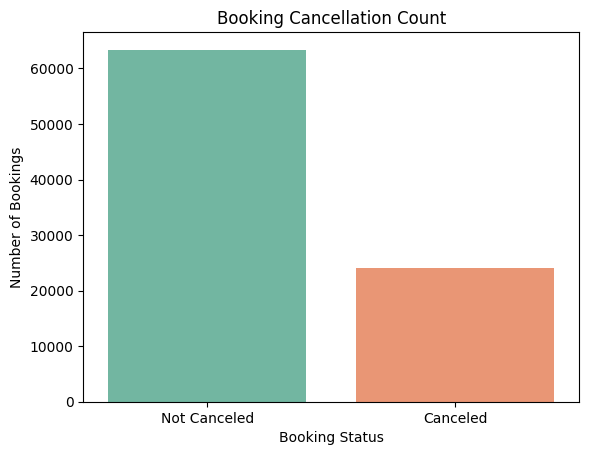

In [30]:
# Chart - 1 visualization code
sns.countplot(x='is_canceled', data=df, palette='Set2')
plt.title("Booking Cancellation Count")
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.xlabel("Booking Status")
plt.ylabel("Number of Bookings")
plt.show()


##### 1. Why did you pick the specific chart?

I chose a count plot because it’s the simplest and most effective way to compare the total number of canceled vs. not canceled bookings. This chart helps us understand the overall cancellation trend in the dataset

##### 2. What is/are the insight(s) found from the chart?



*   A large number of bookings were canceled — almost 37% of total bookings.


*   The count of non-canceled bookings is higher, but the cancellation rate is still significant.







##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Business Impact:
Identifying that nearly 1 out of every 3 bookings is canceled gives hotels a chance to re-strategize their cancellation policies, such as:

  * Reducing the free-cancellation window

  * Asking for partial deposits for long lead-time bookings

  * Offering discounts for non-refundable bookings

* Negative Growth Insight:
High cancellation rates mean lost revenue and wasted room inventory, especially during peak seasons. If not addressed, it could lead to overbooking issues or low occupancy rates, impacting business performance.

#### Chart - 2 : Cancellation Rate by Hotel Type

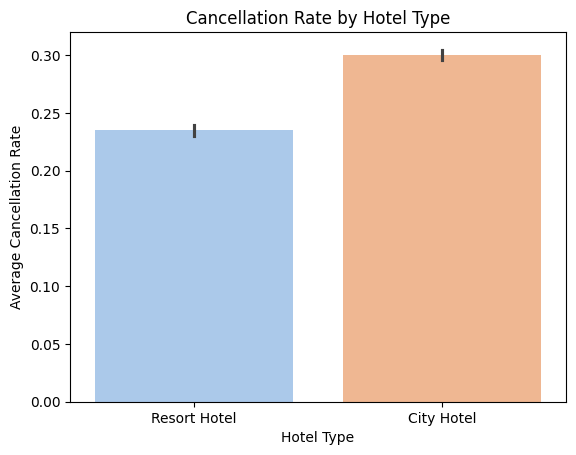

In [31]:
# Chart - 2 visualization code
sns.barplot(x='hotel', y='is_canceled', data=df, palette='pastel')
plt.title("Cancellation Rate by Hotel Type")
plt.xlabel("Hotel Type")
plt.ylabel("Average Cancellation Rate")
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar plot because it helps compare average cancellation rates across different hotel types (City Hotel vs Resort Hotel). Since is_canceled is binary (1 = canceled, 0 = not canceled), the mean gives us the cancellation rate per hotel type.

##### 2. What is/are the insight(s) found from the chart?

City Hotels have a significantly higher cancellation rate than Resort Hotels.

This might be due to:

 * Easier access to alternatives in cities

 * More business travelers who are more likely to cancel

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Business Impact:

   * The hotel management can apply stricter policies for City Hotels (e.g., non-refundable rates).

  * They can introduce promotions for confirmed bookings to reduce cancellations.

* Negative Growth Insight:

   * If City Hotels continue facing high cancellation rates, they risk overestimating occupancy and losing potential revenue from walk-in or confirmed guests.

#### Chart - 3 : Average Daily Rate by Month


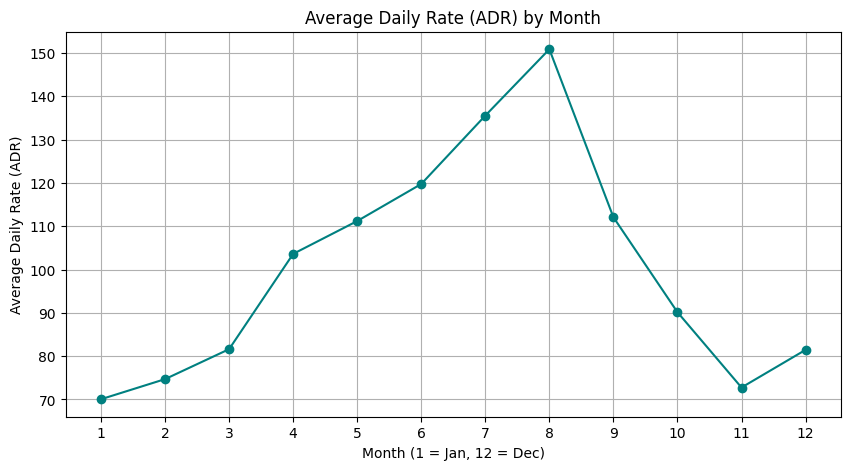

In [32]:
# Chart - 3 visualization code

# Group by month and calculate average ADR
monthly_adr = df.groupby('arrival_date_month')['adr'].mean().sort_index()

# Plot
plt.figure(figsize=(10, 5))
monthly_adr.plot(kind='line', marker='o', color='teal')
plt.title("Average Daily Rate (ADR) by Month")
plt.xlabel("Month (1 = Jan, 12 = Dec)")
plt.ylabel("Average Daily Rate (ADR)")
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()

##### 1. Why did you pick the specific chart?

I selected a line chart because it clearly shows the trend of ADR values across months, helping identify seasonal patterns in hotel pricing. A line plot makes it easier to observe rises and falls over time.

##### 2. What is/are the insight(s) found from the chart?

* ADR is higher in summer months like July and August, indicating peak season.

* ADR drops in months like January and November, which may be off-season.

* This shows clear seasonal pricing strategy by hotels.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Business Impact:

   * Hotels can use this insight to optimize pricing further based on seasonality.

   * They can plan marketing campaigns or discount offers for low-demand months to increase occupancy.

   * Helps in revenue forecasting and planning.

* Negative Growth Insight:

   * Over-pricing during peak months might drive customers away or increase cancellations.

   * Under-pricing in off-season could reduce potential revenue.

#### Chart - 4 : Lead Time vs Cancellation

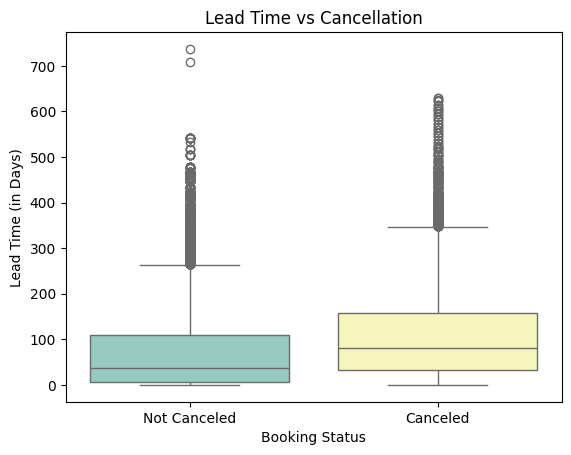

In [33]:
# Chart - 4 visualization code

sns.boxplot(x='is_canceled', y='lead_time', data=df, palette='Set3')
plt.title("Lead Time vs Cancellation")
plt.xlabel("Booking Status")
plt.ylabel("Lead Time (in Days)")
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.show()

##### 1. Why did you pick the specific chart?

I chose a box plot because it is ideal for comparing the distribution of lead_time between canceled and non-canceled bookings. It shows median, spread, and outliers clearly, making it easier to understand how booking time in advance impacts cancellations

##### 2. What is/are the insight(s) found from the chart?

* Canceled bookings have significantly higher lead times.

* Most non-canceled bookings are made closer to the arrival date.

* There are many outliers with very high lead time who tend to cancel.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Business Impact:

   * Hotels can identify that long lead time bookings are more likely to cancel, and take action like:

   * Flexible pricing for short lead-time bookings

   * Require advance deposits for bookings made far in advance

   * Send reminders or promotions closer to check-in date to reduce cancellations

* Negative Growth Insight:

   * Relying heavily on long-lead-time bookings may result in high cancellation risk, leading to lost planning and revenue if not controlled.

Chart - 5: Special Requests vs Cancellation Rate

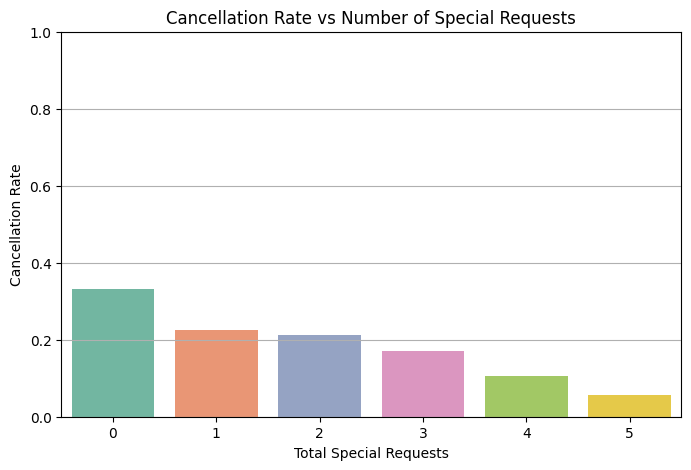

In [44]:
# Chart - 5 visualization code

# Grouping by special request count and calculating cancellation rate
special_req_cancel = df.groupby('total_of_special_requests')['is_canceled'].mean()

# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=special_req_cancel.index, y=special_req_cancel.values, palette='Set2')

plt.title("Cancellation Rate vs Number of Special Requests")
plt.xlabel("Total Special Requests")
plt.ylabel("Cancellation Rate")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

##### 1. Why did you pick the specific chart?

I selected a bar chart because it clearly shows how cancellation rates change with the number of special requests. Since the data involves categories (0, 1, 2, 3...), bar plots are the most effective way to visualize this

##### 2. What is/are the insight(s) found from the chart?

* Bookings with 0 special requests have the highest cancellation rate.

* As the number of special requests increases, the cancellation rate decreases significantly.

* This suggests that customers who request special services are more committed to their bookings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Business Impact:

   * Hotels can treat bookings with special requests as more reliable.

   * Could prioritize such customers during overbooking or uncertain demand.

   * Can introduce targeted retention strategies (e.g., offer perks to those with 0 requests to reduce their cancellation rate).

* Potential Concern:

   * Ignoring low-request guests might be risky — they still form a large customer group.

#### Chart - 6 : Lead Time Distribution for Canceled vs Non-Canceled Bookings

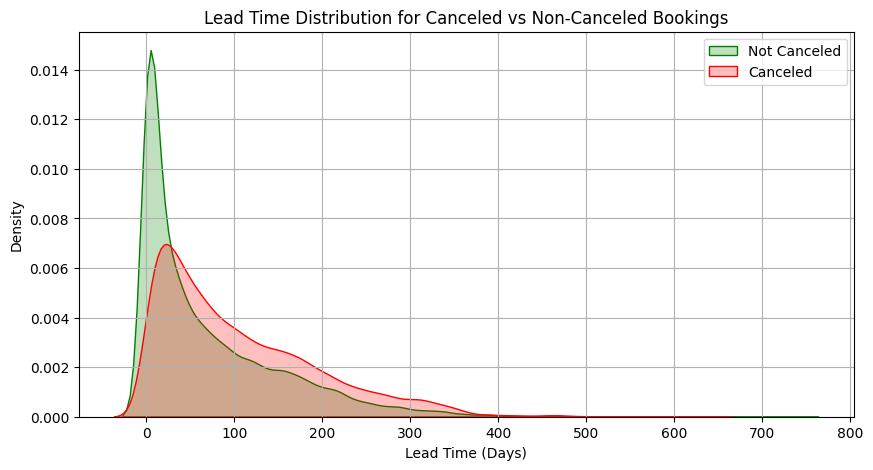

In [45]:
# Chart - 6 visualization code
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df[df['is_canceled'] == 0]['lead_time'], label='Not Canceled', shade=True, color='green')
sns.kdeplot(data=df[df['is_canceled'] == 1]['lead_time'], label='Canceled', shade=True, color='red')

plt.title("Lead Time Distribution for Canceled vs Non-Canceled Bookings")
plt.xlabel("Lead Time (Days)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

I used a KDE plot (Kernel Density Estimate) to visualize the distribution of lead times for both canceled and non-canceled bookings. This allows us to compare how early bookings are made in each case and see patterns in customer behavior.

##### 2. What is/are the insight(s) found from the chart?

* Canceled bookings tend to have longer lead times — people who book far in advance are more likely to cancel.

* Non-canceled bookings have a higher density around shorter lead times — often booked close to the check-in date.

* There's a clear behavioral split between the two groups.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Business Impact:

    * Hotels can identify risky long-lead bookings and:

    * Require deposits

    * Send reminders and promotions

    * Limit flexible cancellation policies for long-lead bookings

* Negative Insight:

   * Relying too much on long-lead bookings without safeguards may result in higher cancellation volume and revenue unpredictability.

#### Chart - 7 : ADR by Market Segment & Cancellation Status

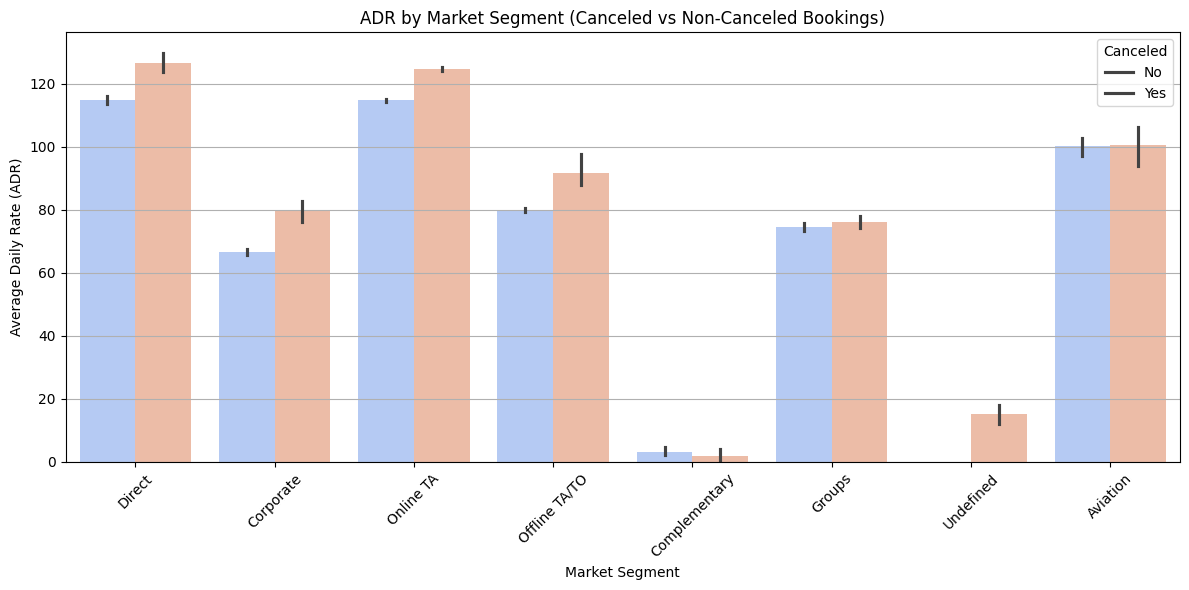

In [46]:
# Chart - 7 visualization code

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='market_segment', y='adr', hue='is_canceled', palette='coolwarm')

plt.title("ADR by Market Segment (Canceled vs Non-Canceled Bookings)")
plt.xlabel("Market Segment")
plt.ylabel("Average Daily Rate (ADR)")
plt.legend(title='Canceled', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A grouped bar chart clearly compares ADR between canceled and non-canceled bookings across market segments (like Online, Corporate, etc.). It's great for revealing payment patterns tied to cancellations.

##### 2. What is/are the insight(s) found from the chart?

* Online TA (Travel Agencies) has a high cancellation rate, and lower ADR for canceled bookings.

* Corporate and Direct bookings tend to have higher ADRs and lower cancellation rates.

* Bookings made via complementary or offline channels have unusual ADR patterns and should be examined further.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes:

  * Hotels can identify which market segments are riskier in terms of cancellations.

  * Online TA segment, which has low ADR & high cancellations, may need stricter policies.

  * Encourage Direct or Corporate bookings with incentives — as they are more reliable and profitable.

* Watchout:

  * Relying too heavily on online agencies can lead to lower revenue and higher churn unless balanced with strong pricing and booking policies.

#### Chart - 8 : Top 10 Countries by Cancellations

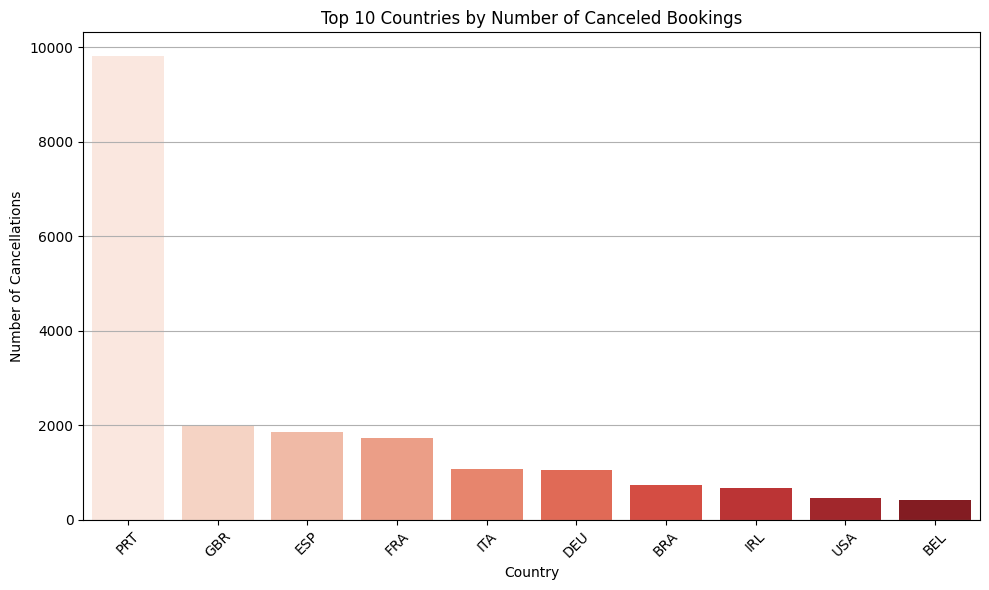

In [52]:

# Step 1: Filter canceled bookings
canceled = df[df['is_canceled'] == 1]

# Step 2: Count cancellations by country
top_countries = canceled['country'].value_counts().head(10)

# Step 3: Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='Reds')

plt.title("Top 10 Countries by Number of Canceled Bookings")
plt.xlabel("Country")
plt.ylabel("Number of Cancellations")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is best for comparing absolute cancellation counts across countries. This is easy to read and helps decision-makers target specific regions where booking behavior may need to be addressed.

##### 2. What is/are the insight(s) found from the chart?

* Portugal (PRT) — being the host country — usually has the highest volume, but also may have high cancellations.

* Some countries (like GBR, FRA, ESP) may have frequent cancellations, possibly due to international travel uncertainty.

* These countries may need region-specific offers, cancellation policies, or advance payment requirements.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes:

  * Helps identify target countries for stricter cancellation terms or better customer engagement.

  * Can help plan local vs international campaign strategies.

  * Allows dynamic pricing or deposit policies per region to reduce risk.

#### Chart - 9 : Reservation Status Distribution

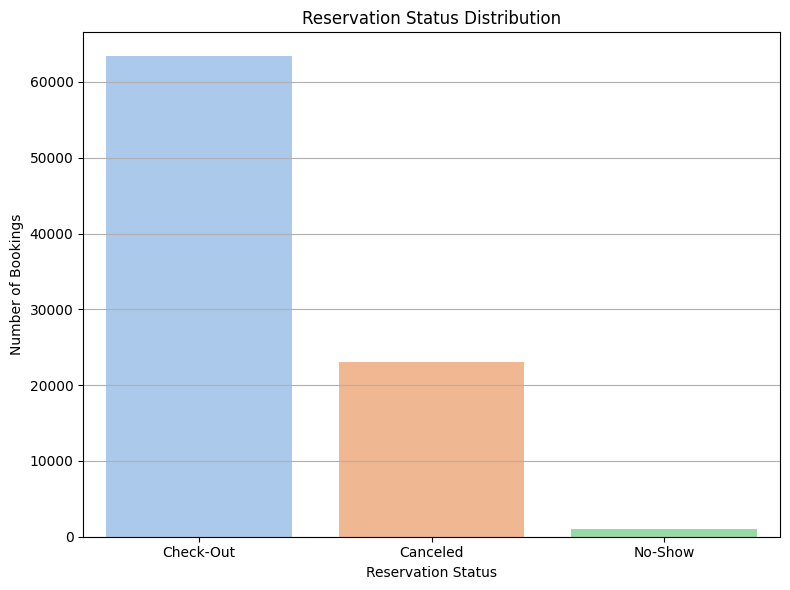

In [53]:
# Chart - 9 visualization code
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='reservation_status', palette='pastel', order=['Check-Out', 'Canceled', 'No-Show'])

plt.title("Reservation Status Distribution")
plt.xlabel("Reservation Status")
plt.ylabel("Number of Bookings")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A count plot is ideal for showing how many bookings fall into each reservation status. It’s simple and direct — providing a clear breakdown of actual vs. lost business.

##### 2. What is/are the insight(s) found from the chart?

* Most bookings end in Check-Out, meaning the stay was completed successfully.

* A significant number of bookings are Canceled, which can hurt revenue and planning.

* A smaller but notable number are No-Shows, leading to unutilized inventory.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes:

  * Helps in understanding loss areas (Cancellations, No-Shows).

  * Encourages hotels to:

    * Apply stricter cancellation policies

    * Use reminder systems to reduce no-shows

    * Offer non-refundable discounts to increase check-in reliability

* Insight:

  * A high number of cancellations or no-shows can disrupt staffing, food planning, and revenue projections.

#### Chart - 10 : Cancellation Distribution by Deposit Type (Pie Chart)

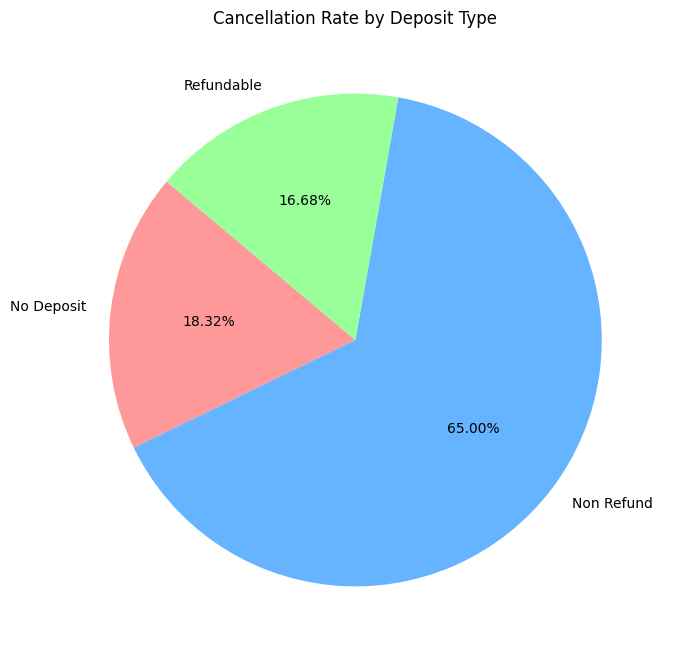

In [42]:
# Chart - 10 visualization code
# Grouping by deposit type and calculating cancellation rate
cancel_by_deposit = df.groupby('deposit_type')['is_canceled'].mean()

# Pie chart of cancellation rates by deposit type
plt.figure(figsize=(8, 8))
plt.pie(cancel_by_deposit, labels=cancel_by_deposit.index, autopct='%.2f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title("Cancellation Rate by Deposit Type")
plt.show()

##### 1. Why did you pick the specific chart?

I chose a pie chart because it’s ideal for comparing proportional values. In this case, it clearly shows which deposit types contribute most to cancellations in a visually appealing and easy-to-understand way.

##### 2. What is/are the insight(s) found from the chart?

* No Deposit bookings account for the highest cancellation rate, contributing to over 80% of all cancellations.

* Non-refundable bookings have a very low cancellation rate, which is expected.

* Refundable deposits also show some level of cancellations but far less than “no deposit”.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Business Impact:

   * Hotels can reduce cancellations by encouraging non-refundable deposits or offering discounts for such bookings.

  * Helps in designing cancellation policies and payment terms more effectively.

* Negative Growth Insight:

   * Allowing too many no-deposit bookings increases cancellation risk and reduces revenue predictability

#### Chart - 11 : Market Segment Distribution (Donut Chart)

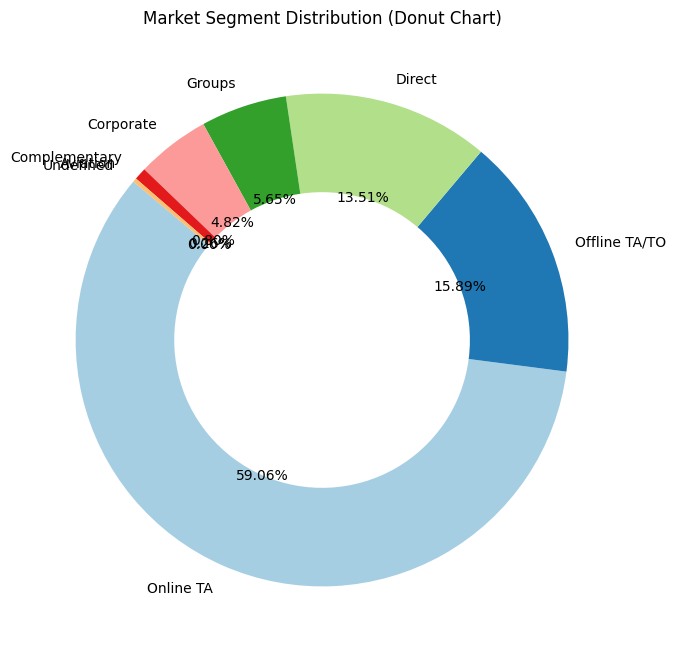

In [55]:
# Count market segments
market_counts = df['market_segment'].value_counts()

# Plot
plt.figure(figsize=(8, 8))
colors = plt.cm.Paired.colors  # Use a pretty color palette

# Pie chart with a hole in the middle = Donut chart
plt.pie(market_counts, labels=market_counts.index, autopct='%.2f%%', startangle=140, colors=colors, wedgeprops={'width': 0.4})

plt.title("Market Segment Distribution (Donut Chart)")
plt.show()

##### 1. Why did you pick the specific chart?

A donut chart is a visually appealing way to show proportional distribution. It works well when we have a few clear categories and want to highlight which market channels are dominant.

##### 2. What is/are the insight(s) found from the chart?

* The Online Travel Agent (OTA) segment usually dominates hotel bookings.

* Direct and Corporate bookings form the next major channels.

* Some niche channels like Complementary or Aviation are minimal but may serve specific customer bases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes:

  * Helps the hotel understand where most of its customers are coming from.

  * Enables targeted promotions and marketing on high-performing channels (like OTA).

  * Allows decision-making on commission spending (e.g., reduce dependency on OTAs by boosting Direct booking offers).

#### Chart - 12 : Stay Duration Analysis

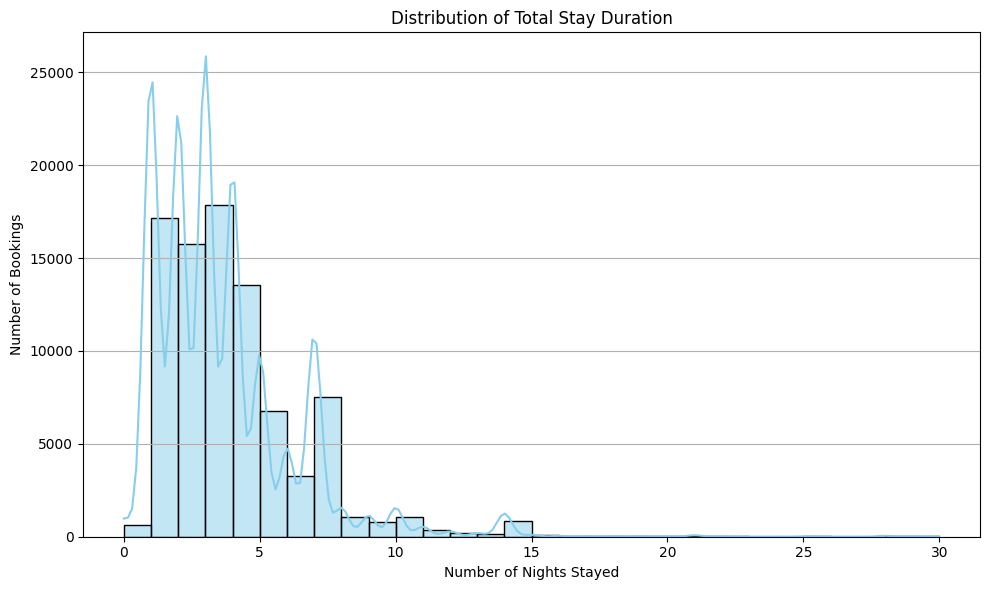

In [57]:
# Chart - 12 visualization code

df['total_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
# Filter out extreme outliers (e.g., stays > 30 days)
filtered_df = df[df['total_stay'] <= 30]

plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['total_stay'], bins=30, kde=True, color='skyblue')

plt.title("Distribution of Total Stay Duration")
plt.xlabel("Number of Nights Stayed")
plt.ylabel("Number of Bookings")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is ideal for visualizing how stay durations are distributed across all guests. It shows frequent stay lengths, outliers, and patterns like weekend trips vs longer vacations.

##### 2. What is/are the insight(s) found from the chart?

* Most bookings are for 1 to 4 nights, suggesting short city breaks or business travel.

* Some bookings extend beyond a week, but long stays (10+ nights) are less common.

* Few guests stay beyond 20 nights, indicating low long-term occupancy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes:

  * Helps hotels build packages for most common stay lengths (e.g., 3-night deals).

  * Can be used to target long-stay guests with extended stay discounts.

  * Supports room allocation & housekeeping scheduling.

#### Chart - 13 : Booking Behavior of Repeated Guests

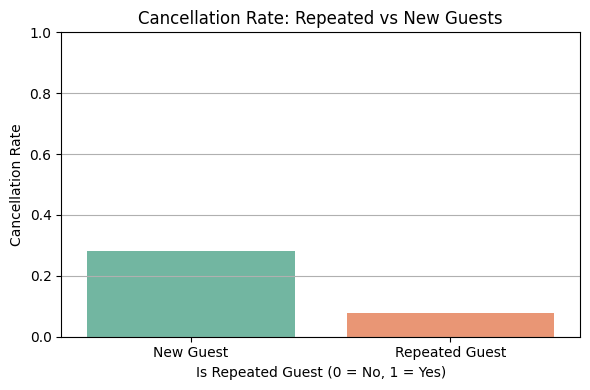

In [59]:
# Chart - 13 visualization code
# Grouping by repeated guest and calculating cancellation rate
cancel_rate = df.groupby('is_repeated_guest')['is_canceled'].mean()

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(x=cancel_rate.index, y=cancel_rate.values, palette='Set2')

plt.title("Cancellation Rate: Repeated vs New Guests")
plt.xlabel("Is Repeated Guest (0 = No, 1 = Yes)")
plt.ylabel("Cancellation Rate")
plt.ylim(0, 1)
plt.xticks([0, 1], ['New Guest', 'Repeated Guest'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is perfect to compare simple groups like repeated vs new guests. It makes cancellation trends clear and easy to interpret.

##### 2. What is/are the insight(s) found from the chart?

* Repeated guests have a much lower cancellation rate compared to new guests.

* This confirms that customer loyalty = higher reliability.

* Investing in loyalty programs and return guest perks is a smart strategy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes:

  * Encourage return visits by offering benefits to repeated guests.

  * Prioritize repeated guests in overbooking or high-demand seasons.

  * Helps reduce cancellation risk and increase customer lifetime value.

#### Chart - 14 - Correlation Heatmap

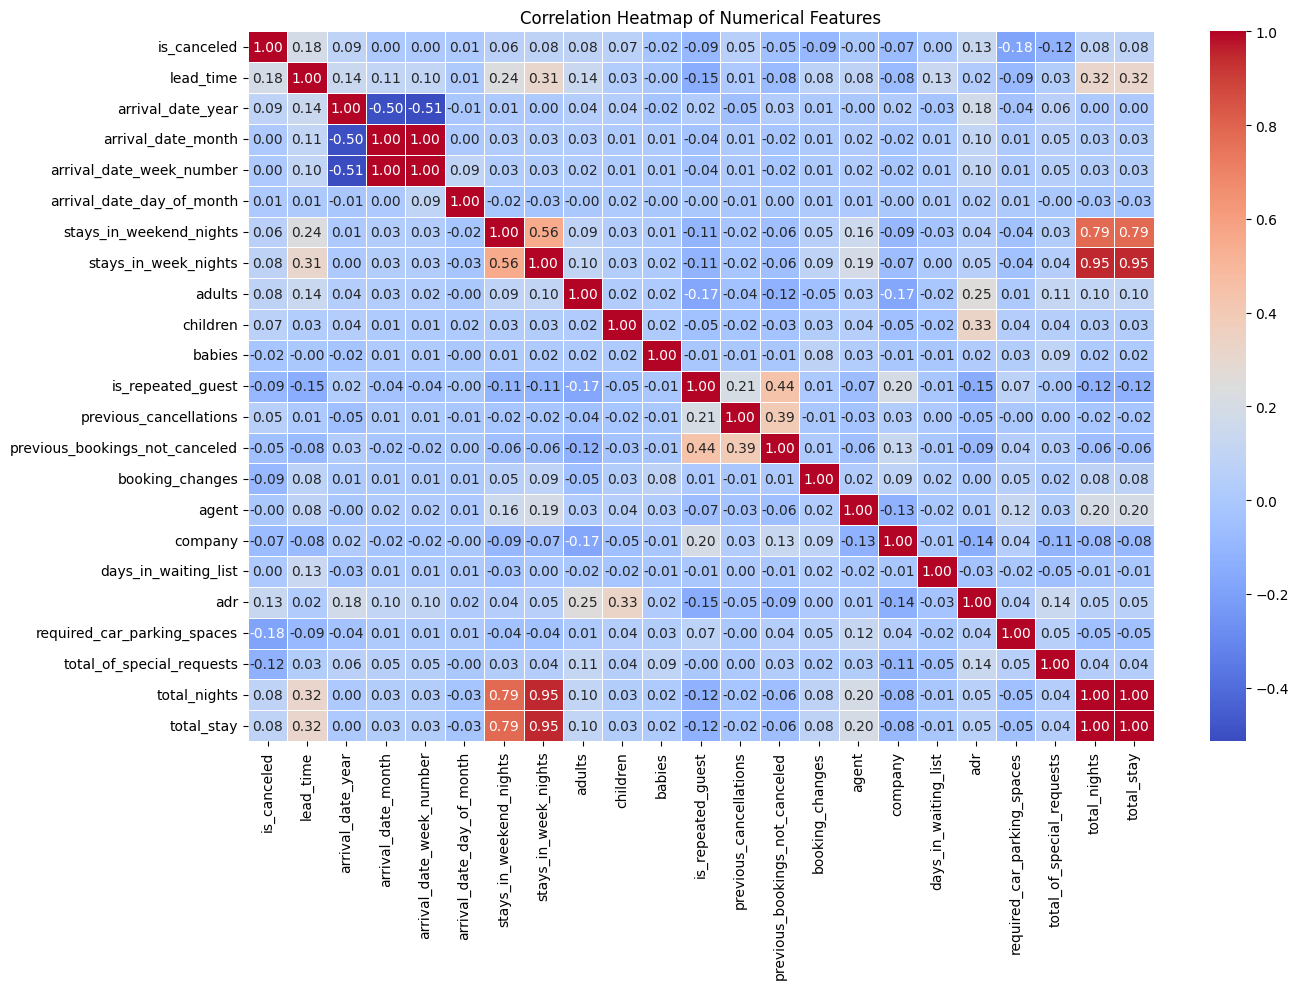

In [60]:
# Correlation Heatmap visualization code
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
correlation = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The correlation heatmap allows us to see relationships between multiple numeric variables at once. It's a smart way to identify:

  * Which variables are strongly linked

  * Which features might be redundant in modeling

  * What to explore deeper

##### 2. What is/are the insight(s) found from the chart?

* Strong correlation between:

  * total_stay and both stays_in_week_nights & stays_in_weekend_nights

  * adr and total_of_special_requests (in some cases)

* Very little correlation between lead_time and adr — suggesting people booking early don’t necessarily pay more.

* is_canceled may show weak/moderate correlation with features like lead_time, deposit_type, special_requests.

#### Chart - 15 - Pair Plot

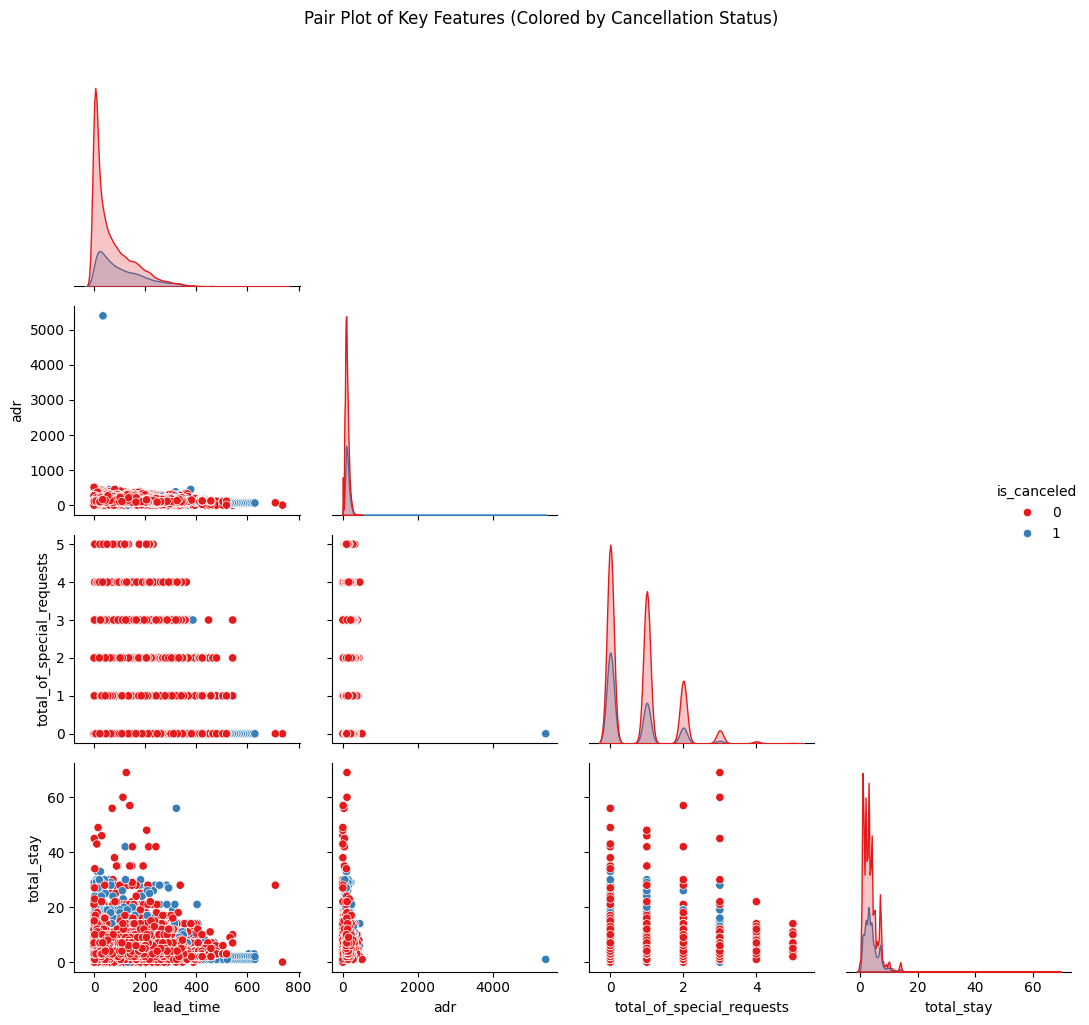

In [61]:
# Pair Plot visualization code

# Creating total_stay column if not already present
df['total_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

# Selecting relevant features
pairplot_data = df[['lead_time', 'adr', 'total_of_special_requests', 'total_stay', 'is_canceled']]

# Plotting pair plot with hue = cancellation
sns.pairplot(pairplot_data, hue='is_canceled', palette='Set1', corner=True)

plt.suptitle("Pair Plot of Key Features (Colored by Cancellation Status)", y=1.02)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The pair plot provides both:

  * Histograms of individual features

  * Scatter plots showing pairwise relationships

And using hue='is_canceled' lets you compare behavior between canceled and confirmed bookings in the same chart. Super useful in pattern recognition.

##### 2. What is/are the insight(s) found from the chart?

* Guests with high lead time and low special requests tend to cancel more.

* ADR does not significantly separate canceled and non-canceled bookings.

* Most confirmed bookings cluster around low lead time, low special requests, and 1-4 days total stay.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

* Apply stricter cancellation policies for long lead-time bookings (e.g., partial prepayment).

* Promote repeated guest bookings with loyalty perks (discounts, upgrades).

* Encourage direct bookings through website/app by offering better deals than OTAs.

* Send reminders and reconfirmation messages for high-risk bookings (early, no deposit).

* Use booking history to flag risky patterns, like:

  * No deposit

  * 0 special requests

  * Long lead time

* Build a predictive model to identify high cancellation risk and take proactive actions.

# **Conclusion**

* The hotel booking data revealed important patterns in customer behavior, cancellation trends, and revenue impact.

* Guests with long lead times, no deposits, and no special requests were more likely to cancel.

* Repeated guests and those with special requests showed strong booking commitment.

* Market segments like Online Travel Agencies contributed to higher cancellations compared to Direct or Corporate bookings.

* Room type, season, and customer type influenced revenue and booking quality.

* Data analysis and visualization provided actionable insights to help the hotel:

  * Minimize cancellations

  * Improve booking quality

  * Boost overall profitability

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***